In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: Least-squares via row-reduction
---


In [68]:

m = 10
n = 3

# create data
X = np.random.randn(m,n) # "design matrix"
y = np.random.randn(m,1) # "outcome measures (data)"

# try directly applying RREF
Xy = Matrix( np.concatenate([X,y],axis=1) )
# print( Xy.rref() )

# now reapply to the normal equations
XtX = np.matrix.transpose(X)@X
Xty = np.matrix.transpose(X)@y
normEQ = Matrix( np.concatenate( [XtX,Xty],axis=1 ) )

Xsol = normEQ.rref()
Xsol = Xsol[0]
beta = Xsol[:,-1]

print('')
print(beta)

# compare to left-inverse
beta2 = np.linalg.inv(XtX) @ Xty
print('')
print(beta2)

# and with the python solver
beta3 = np.linalg.solve(XtX,Xty)
print('')
print(beta3)


Matrix([[-0.271227078298994], [0.239281874528459], [0.354566927464929]])

[[-0.27122708]
 [ 0.23928187]
 [ 0.35456693]]

[[-0.27122708]
 [ 0.23928187]
 [ 0.35456693]]



---
# VIDEO: Least-squares example 1
---


[[ 2.125]] 2.125


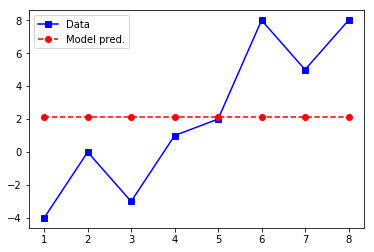

In [2]:

# data
data = np.array([[-4,0,-3,1,2,8,5,8]]).T # the ".T" is for transpose
N    = len(data)

# design matrix
X = np.ones([N,1])
# fit the model
b = np.linalg.solve(np.matrix.transpose(X)@X,np.matrix.transpose(X)@data)

# compare against the mean
m = np.mean(data)

# print the results
print(b,m)

# compute the model-predicted values
yHat = X@b

# plot data and model prediction
plt.plot(np.arange(1,N+1),data,'bs-',label='Data')
plt.plot(np.arange(1,N+1),yHat,'ro--',label='Model pred.')

plt.legend()
plt.show()

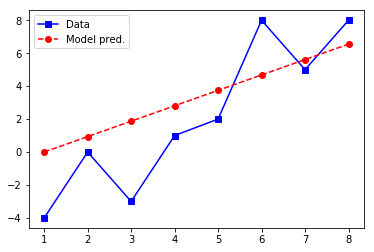

In [138]:

# new design matrix
X = np.array([np.arange(0,N)]).T
# fit the model
b = np.linalg.solve(np.matrix.transpose(X)@X,np.matrix.transpose(X)@data)

# compute the model-predicted values
yHat = X@b

# plot data and model prediction
plt.plot(np.arange(1,N+1),data,'bs-',label='Data')
plt.plot(np.arange(1,N+1),yHat,'ro--',label='Model pred.')

plt.legend()
plt.show()

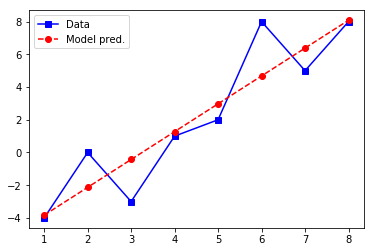

In [9]:

# design matrix
X = np.concatenate( [np.ones([N,1]),np.array([np.arange(0,N)]).T],axis=1)
# fit the model
b = np.linalg.solve(np.matrix.transpose(X)@X,np.matrix.transpose(X)@data)

# compute the model-predicted values
yHat = X@b

# plot data and model prediction
plt.plot(np.arange(1,N+1),data,'bs-',label='Data')
plt.plot(np.arange(1,N+1),yHat,'ro--',label='Model pred.')

plt.legend()
plt.show()


---
# VIDEO: Least-squares example 2
---


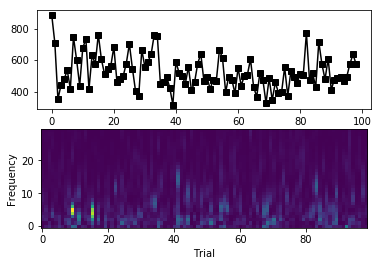

In [195]:

# load data
data = sio.loadmat('EEG_RT_data.mat')
rts = data['rts']
rts = rts[0]
EEGdata = data['EEGdata']
frex = data['frex']
frex = frex[0]

nTrials = len(rts)
nFrex = len(frex)


# show the data
plt.subplot(211)
plt.plot(rts,'ks-')
plt.xlabel('Trial')

plt.subplot(212)
plt.imshow(EEGdata,origin='lower')
plt.xlabel('Trial'), plt.ylabel('Frequency')
plt.show()

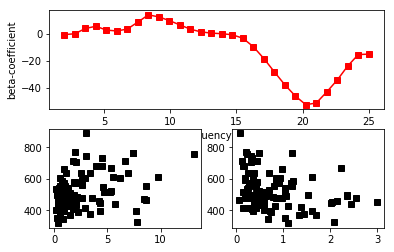

In [144]:
# initialize beta coefficients vector
b = np.zeros(len(frex))

# loop over frequencies
for fi in np.arange(0,len(frex)):
    
    # design matrix
    X = np.concatenate( [np.ones([nTrials,1]),np.reshape(EEGdata[fi,:],(nTrials,1))],axis=1)
    
    # compute parameters
    t = np.linalg.solve(np.matrix.transpose(X)@X,np.matrix.transpose(X)@rts)
    b[fi] = t[1]


# plots
plt.subplot(211)
plt.plot(frex,b,'rs-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('beta-coefficient')

plt.subplot(223)
plt.plot(EEGdata[8,:],rts,'ks')

plt.subplot(224)
plt.plot(EEGdata[23,:],rts,'ks')
plt.show()
